In [1]:
!pip install pyxpcm

  Using cached Cartopy-0.21.1.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build cartopy


  error: subprocess-exited-with-error
  
  × Building wheel for cartopy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [279 lines of output]
      <string>:90: UserWarning: Unable to determine GEOS version. Ensure you have 3.7.2 or later installed, or installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\crs.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\geodesic.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\img_transform.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\util.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\vector_transform.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\_epsg.py -> build\lib.win-amd64-cpython-310\cartopy
      copying lib\cartopy\_

In [2]:
from pyxpcm.models import pcm
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pyxpcm
import os
import tarfile
import xarray as xr
import numpy as np
import pandas as pd

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\pyxpcm\plot.py:45: UserWarning: pyXpcm requires seaborn installed for full plotting functionality
  warnings.warn("pyXpcm requires seaborn installed for full plotting functionality")


In [32]:
# import the self-defined libraries
import plot_toolbox as tb
# from plot_toolbox import plot_pred_map

In [4]:
ds_cleaned = xr.open_dataset("/home/jovyan/data_array/ds_cleaned.nc")

In [5]:
ds_cleaned

<xarray.Dataset>
Dimensions:      (nprof: 2614, pressure: 99)
Coordinates:
    profiler     (nprof) int64 ...
    date         (nprof) datetime64[ns] ...
    lon          (nprof) float64 ...
    lat          (nprof) float64 ...
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [18]:
# Patitioning the data into training and testing dataset

ratio=0.5 # The ratio of training dataset

size=int(ds_cleaned.nprof.size*ratio)
indices = np.random.choice(ds_cleaned.nprof, size=size, replace=False)
ds_train = ds_cleaned.isel(nprof=indices)

indices = np.setdiff1d(ds_cleaned.nprof, ds_train.nprof)
ds_test = ds_cleaned.isel(nprof=indices)

In [10]:
ds_train

<xarray.Dataset>
Dimensions:      (nprof: 1307, pressure: 99)
Coordinates:
    profiler     (nprof) int64 10 10 108 10 108 10 ... 101 104 103 10 104 105
    date         (nprof) datetime64[ns] 2008-02-09T00:24:17.568000 ... 2019-0...
    lon          (nprof) float64 -110.2 -115.2 -140.1 ... -122.0 -127.9 -135.8
    lat          (nprof) float64 84.03 84.68 80.11 83.61 ... 85.05 81.64 80.36
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

In [19]:
ds_test

<xarray.Dataset>
Dimensions:      (nprof: 1307, pressure: 99)
Coordinates:
    profiler     (nprof) int64 103 108 107 108 10 10 ... 108 103 105 104 108 108
    date         (nprof) datetime64[ns] 2019-02-25T00:02:21.696000 ... 2018-0...
    lon          (nprof) float64 -127.0 -138.5 -137.7 ... -125.4 -140.5 -143.7
    lat          (nprof) float64 78.64 80.15 73.45 76.6 ... 81.63 75.71 76.79
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Dimensions without coordinates: nprof
Data variables:
    temperature  (nprof, pressure) float64 ...
    salinity     (nprof, pressure) float64 ...

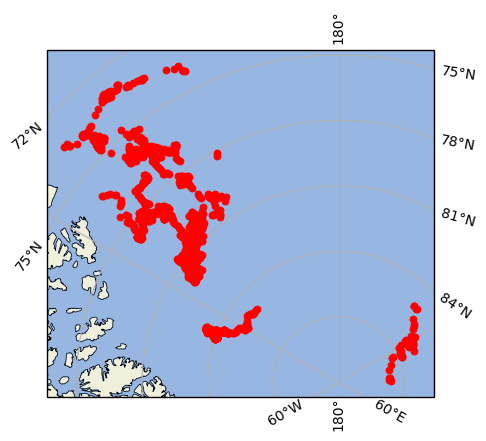

In [14]:
tb.plot_data_location(ds_train)

In [16]:
pstart=-10.
pend=-500.
z = np.arange(pstart,pend,-10.)
pcm_features = {'temperature': z, 'salinity':z}
m = pcm(K=3, features=pcm_features,maxvar=3)
m

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [21]:
features_in_ds = {'temperature': 'temperature', 'salinity': 'salinity'}
m.fit(ds_train,features=features_in_ds,dim='pressure')

<pcm 'gmm' (K: 3, F: 2)>
Number of class: 3
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 1.019760

In [22]:
ds_test=m.predict(ds_test,features=features_in_ds,dim='pressure',inplace=True)

In [36]:
ds_test

<xarray.Dataset>
Dimensions:      (nprof: 1307, pressure: 99)
Coordinates:
  * nprof        (nprof) int64 0 1 2 3 4 5 6 ... 1301 1302 1303 1304 1305 1306
    profiler     (nprof) int64 103 108 107 108 10 10 ... 108 103 105 104 108 108
    date         (nprof) datetime64[ns] 2019-02-25T00:02:21.696000 ... 2018-0...
    lon          (nprof) float64 -127.0 -138.5 -137.7 ... -125.4 -140.5 -143.7
    lat          (nprof) float64 78.64 80.15 73.45 76.6 ... 81.63 75.71 76.79
  * pressure     (pressure) float64 -10.0 -15.0 -20.0 ... -490.0 -495.0 -500.0
Data variables:
    temperature  (nprof, pressure) float64 -1.647 -1.648 ... 0.7964 0.7895
    salinity     (nprof, pressure) float64 30.08 30.1 30.11 ... 34.83 34.83
    PCM_LABELS   (nprof) int64 1 1 2 2 0 0 0 1 0 0 2 1 ... 1 2 1 1 1 1 1 1 1 2 2

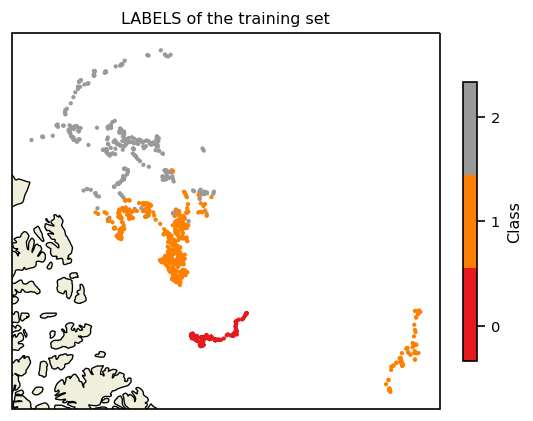

In [33]:
tb.plot_pred_map(ds_test,m)

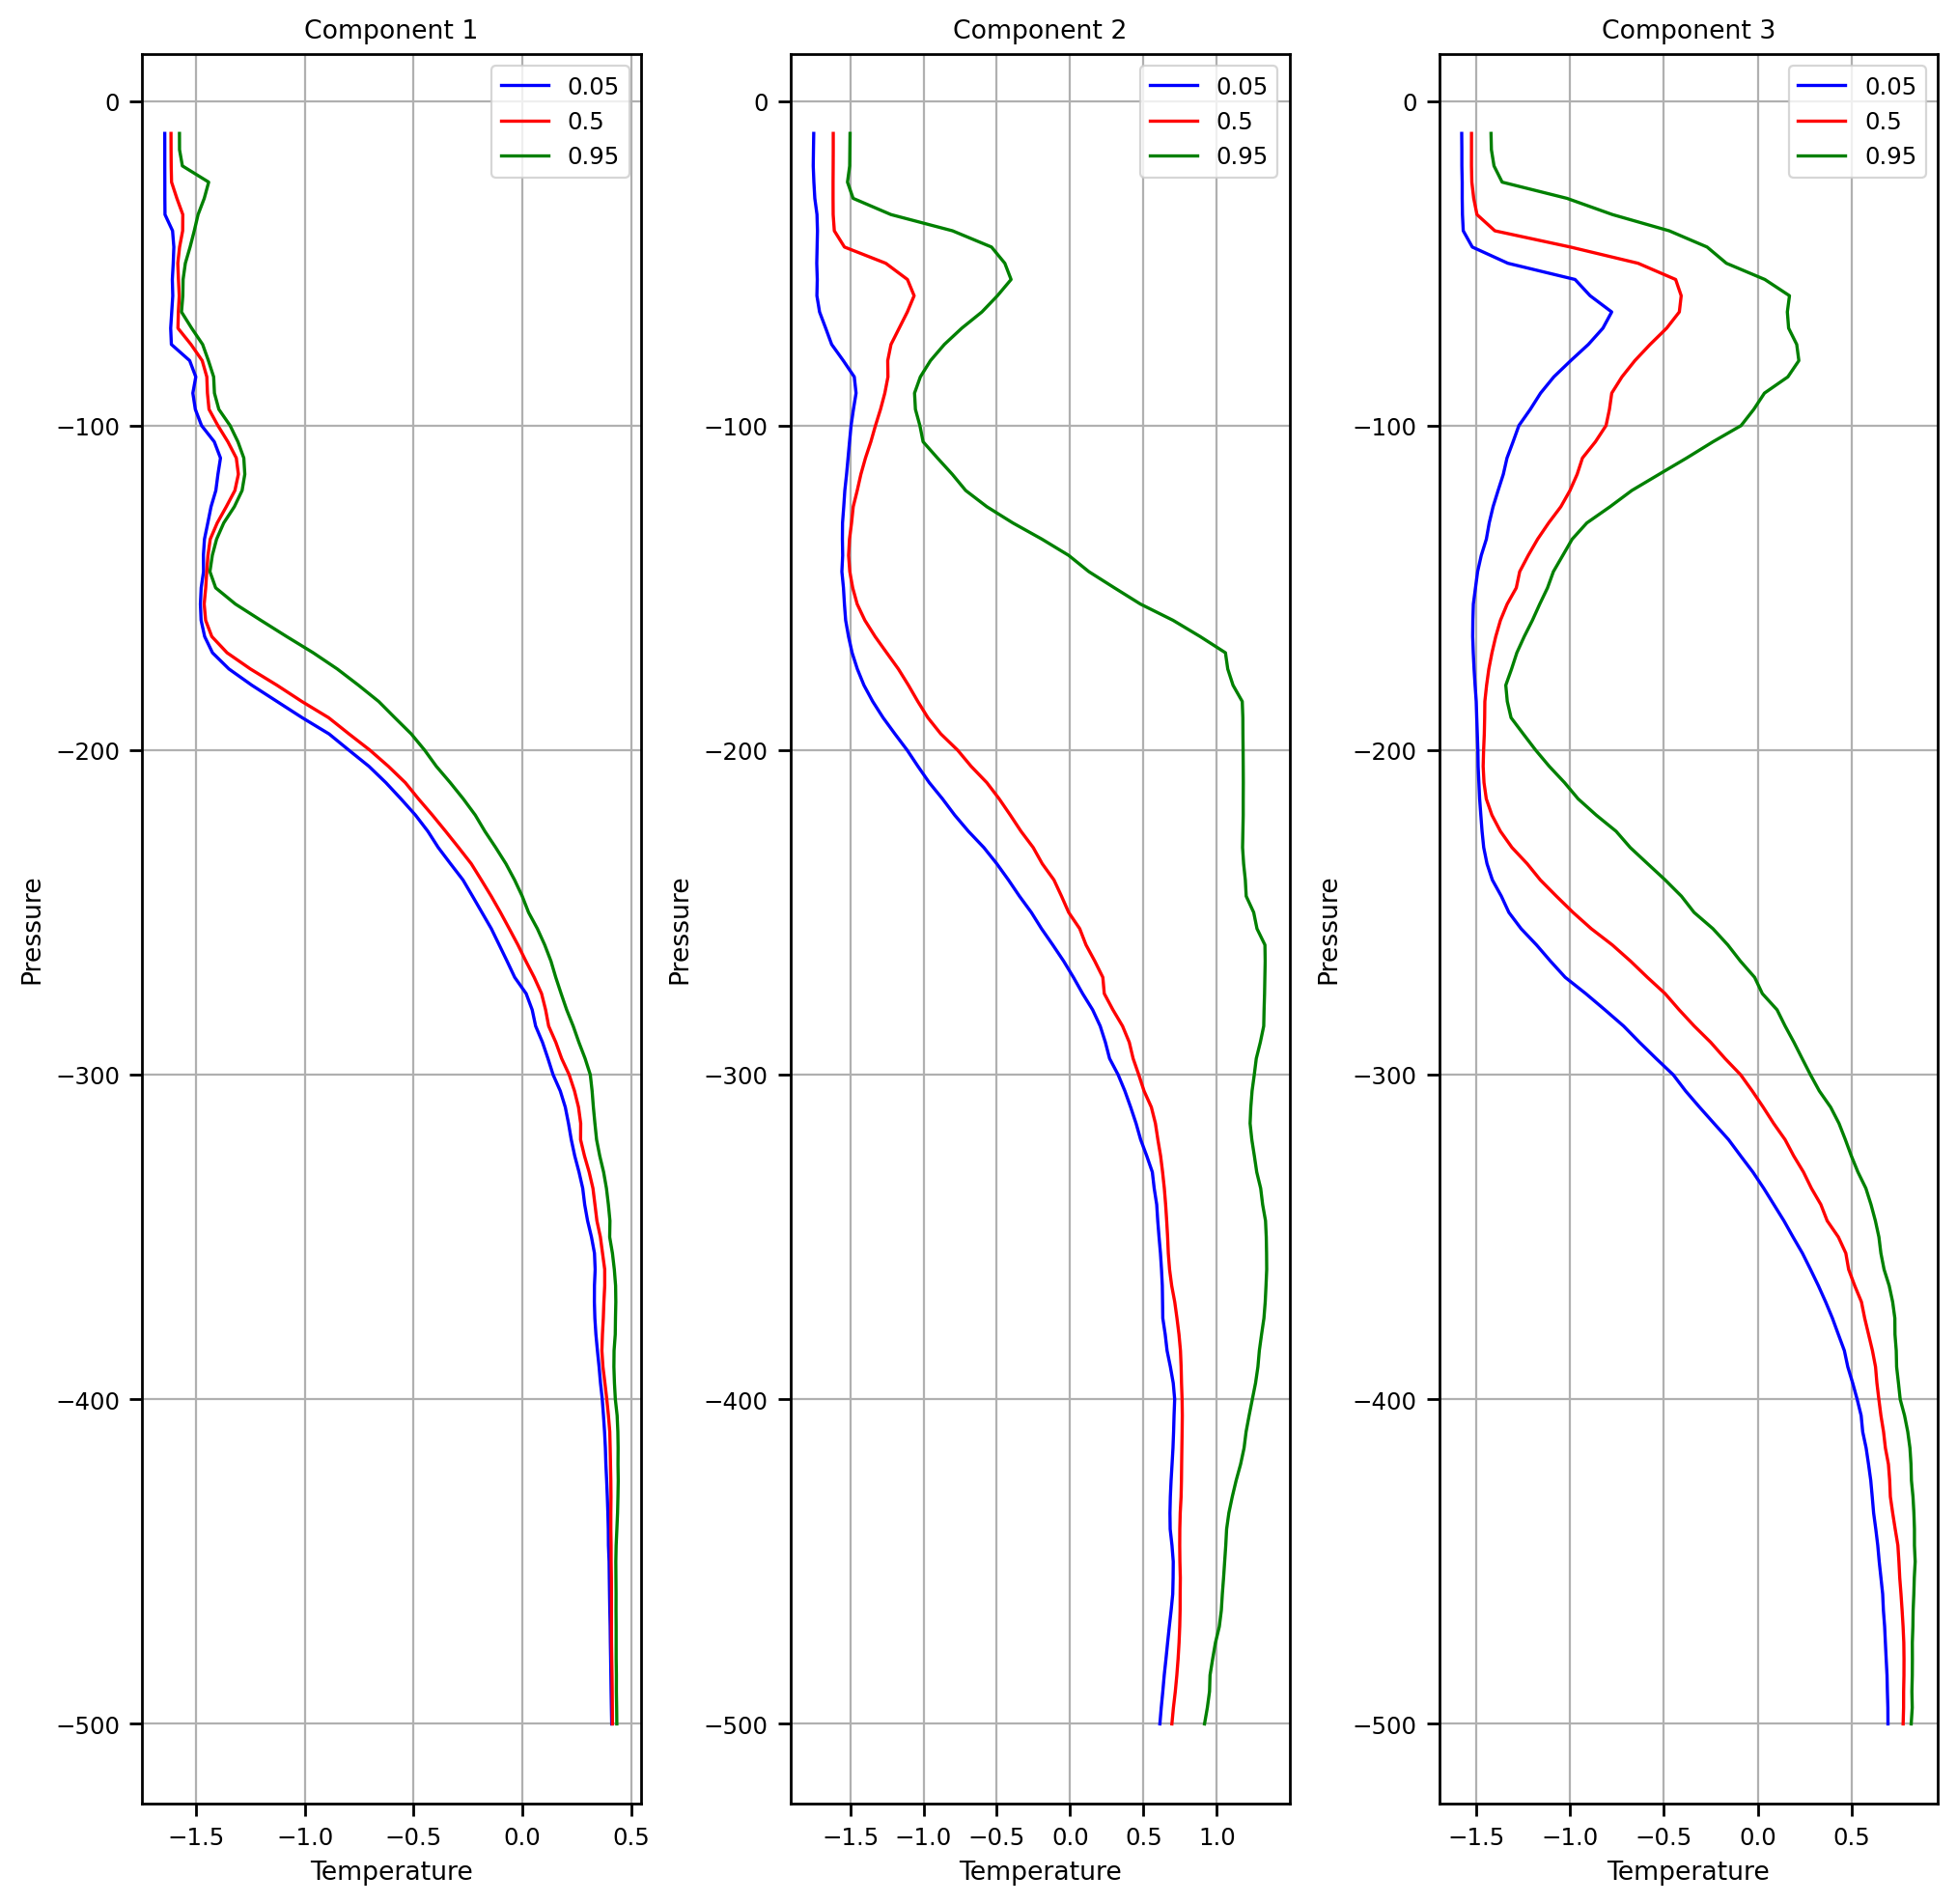

In [37]:
# Calculate the quantile and plot it
for vname in ['temperature', 'salinity']:
    ds_test = ds_test.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)    

ds_group = ds_test.groupby('PCM_LABELS')
tb.plot_quantile(ds_group)